In [10]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('myexcel.xlsx')
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,2023-03-06 00:00:00,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,2023-01-06 00:00:00,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,2023-03-07 00:00:00,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [13]:
df['Height'] = np.random.randint(150,181)
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,176,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,176,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,176,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,176,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,176,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,176,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,176,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,176,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,176,231,Kansas,947276.0


### 1.How many are there in each Team and the percentage splitting with respect to the total employees.

In [4]:
# Count the number of employees in each team
team_counts = df['Team'].value_counts()

# Calculate the total number of employees
total_employees = len(df)

# Calculate the percentage splitting for each team
team_percentages = (team_counts / total_employees) * 100

print("Number of employees in each team:")
print(team_counts)
print("\nPercentage splitting with respect to total employees:")
print(team_percentages)

Number of employees in each team:
Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

Percentage splitting with respect to total employees:
Team
New O

### 2.Segregate the employees w.r.t different positions.

In [20]:
position_counts = df['Position'].value_counts()
position_counts

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64

### 3.Find from which age group most of the employees belong to.

In [5]:
age_bins = [20, 30, 40, 50, 60, 70]
age_labels = ["20-29", "30-39", "40-49", "50-59", "60-69"]

df["Age Group"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels)

age_group_counts = df["Age Group"].value_counts()

most_common_age_group = age_group_counts.idxmax()
print("Age group with the most employees:", most_common_age_group)

Age group with the most employees: 20-29


### 4.Find out under which team and position, spending in terms of salary is high.

In [6]:
team_position_salary = df.groupby(['Team', 'Position'])['Salary'].sum().reset_index()
max_salary_row = team_position_salary.loc[team_position_salary['Salary'].idxmax()]
team_with_highest_salary = max_salary_row['Team']
position_with_highest_salary = max_salary_row['Position']
highest_salary = max_salary_row['Salary']

print("Team with the highest salary spending:", team_with_highest_salary)
print("Position within the team with the highest salary spending:", position_with_highest_salary)
print("Total salary spending in this position:", highest_salary)

Team with the highest salary spending: Los Angeles Lakers
Position within the team with the highest salary spending: SF
Total salary spending in this position: 31866445.0


### 5.Find if there is any correlation between age and salary , represent it visually.

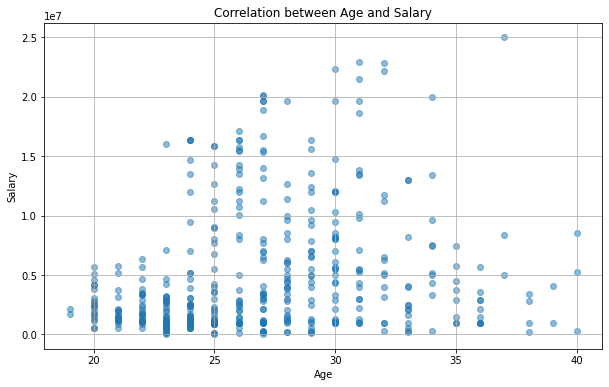

Correlation coefficient between Age and Salary: 0.21


In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Salary'], alpha=0.5)
plt.title('Correlation between Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()
correlation_coefficient = df['Age'].corr(df['Salary'])
print(f"Correlation coefficient between Age and Salary: {correlation_coefficient:.2f}")